In [22]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [24]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [25]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [26]:
tf.keras.backend.clear_session()

In [27]:
subject = 'Rio_de_Janeiro - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [28]:
data = pd.read_csv('2003_raw_Rio_de_Janeiro_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Rio_de_Janeiro - PIB - Per Capita,Rio_de_Janeiro - PIB - Preços de Mercado,Rio_de_Janeiro - PIB - Estadual,Rio_de_Janeiro - PIB - Construção Civil,Rio_de_Janeiro - População,Rio_de_Janeiro - INCC (%),Rio_de_Janeiro - IPCA - Variação mensal durante o Plano Real (%),Rio_de_Janeiro - IGP-DI,Rio_de_Janeiro - Taxa Selic (%),Rio_de_Janeiro - IDH - Longevidade,Rio_de_Janeiro - IDH - Renda,Rio_de_Janeiro - IDH - Educação,Rio_de_Janeiro - NFSP - Fluxo Mensal (Milhões de reais),Rio_de_Janeiro - Estoque liquido de capital fixo - (R$),Rio_de_Janeiro - Desemprego,Rio_de_Janeiro - Produção de Cimento (t),Rio_de_Janeiro - Valor,Rio_de_Janeiro - Consumo de Cimento (t)
0,2003-01-01,2.500502e+07,1.316230e+07,1.698194,2.200222e+07,14724475.0,1.70,12.53,2.70,0.082293,0.74,0.745,0.53,3.46,6.098524e+06,11.712196,NaN,0.31,254362.0
1,2003-02-01,2.500502e+07,1.316230e+07,1.698194,2.200222e+07,14724475.0,1.51,2.25,2.17,0.088771,0.74,0.745,0.53,3.59,6.172460e+06,11.712196,26639.0,0.33,252842.0
2,2003-03-01,2.500502e+07,1.316230e+07,1.698194,2.200222e+07,14724475.0,1.39,3.86,1.59,0.090733,0.74,0.745,0.53,3.84,6.172460e+06,11.712196,54512.0,0.33,229385.0
3,2003-04-01,2.500502e+07,1.316230e+07,1.698194,2.200222e+07,14724475.0,1.38,5.13,1.66,0.092749,0.74,0.745,0.53,3.95,6.172460e+06,11.712196,126390.0,0.33,243407.0
4,2003-05-01,2.500502e+07,1.316230e+07,1.698194,2.200222e+07,14724475.0,0.90,6.15,0.41,0.092758,0.74,0.745,0.53,4.06,6.172460e+06,11.712196,47291.0,0.33,256535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,3.113538e+07,5.253605e+07,1.814420,1.376201e+07,17159960.0,0.58,2.42,-0.01,0.024620,0.86,0.770,0.76,0.69,7.827728e+06,12.300000,62024.0,0.45,244870.0
200,2019-09-01,3.113538e+07,5.253605e+07,1.814420,1.376201e+07,17159960.0,0.42,2.54,-0.51,0.022751,0.86,0.770,0.76,0.62,7.827728e+06,12.000000,NaN,0.45,225410.0
201,2019-10-01,3.113538e+07,5.253605e+07,1.814420,1.376201e+07,17159960.0,0.46,2.49,0.50,0.022035,0.86,0.770,0.76,0.59,7.827728e+06,11.900000,69404.0,0.45,252849.0
202,2019-11-01,3.113538e+07,5.253605e+07,1.814420,1.376201e+07,17159960.0,0.18,2.60,0.55,0.020790,0.86,0.770,0.76,0.57,7.827728e+06,11.700000,17273.0,0.45,226618.0


In [29]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      246.602
1      237.093
2      270.163
3      263.941
4      273.825
        ...   
199        NaN
200        NaN
201        NaN
202        NaN
203        NaN
Name: Rio_de_Janeiro - Consumo de Cimento (t), Length: 204, dtype: float64

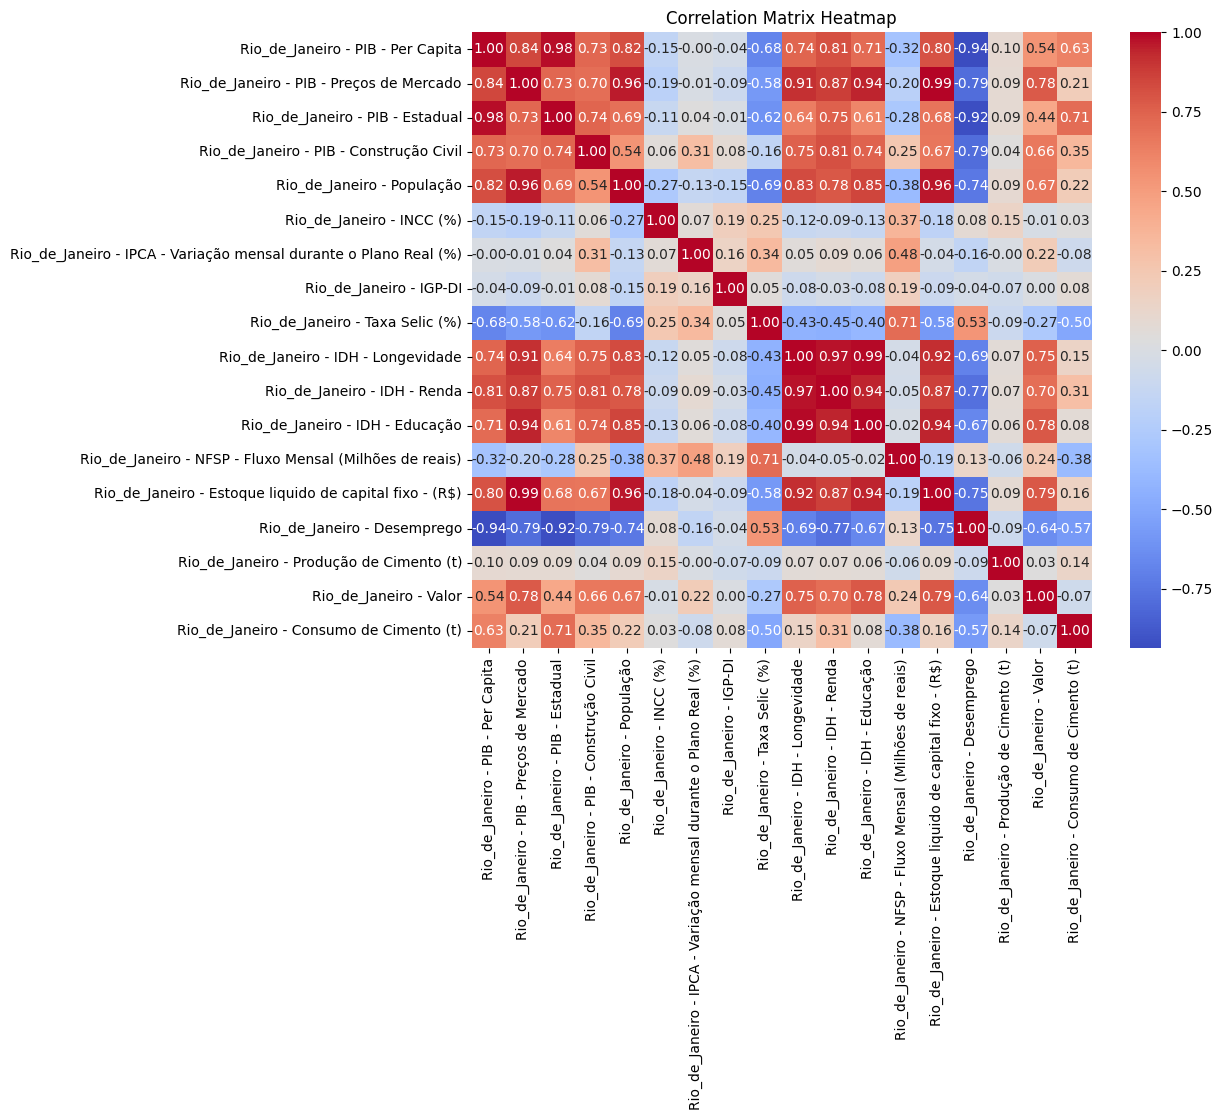

In [30]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [31]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(0.0)
input_data

,Rio_de_Janeiro - PIB - Per Capita,Rio_de_Janeiro - PIB - Preços de Mercado,Rio_de_Janeiro - PIB - Estadual,Rio_de_Janeiro - PIB - Construção Civil,Rio_de_Janeiro - População,Rio_de_Janeiro - INCC (%),Rio_de_Janeiro - IPCA - Variação mensal durante o Plano Real (%),Rio_de_Janeiro - IGP-DI,Rio_de_Janeiro - Taxa Selic (%),Rio_de_Janeiro - IDH - Longevidade,Rio_de_Janeiro - IDH - Renda,Rio_de_Janeiro - IDH - Educação,Rio_de_Janeiro - NFSP - Fluxo Mensal (Milhões de reais),Rio_de_Janeiro - Estoque liquido de capital fixo - (R$),Rio_de_Janeiro - Desemprego,Rio_de_Janeiro - Produção de Cimento (t),Rio_de_Janeiro - Valor
0,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,1.998868,4.052332,3.466715,2.303195,-0.931060,-0.923237,-0.910370,3.108599,-1.539424,0.874455,0.000000,-0.498291
1,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,1.647487,-0.596188,2.630940,2.745235,-0.931060,-0.923237,-0.910370,3.275709,-1.411460,0.874455,-0.531307,-0.179815
2,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,1.425561,0.131839,1.716318,2.879123,-0.931060,-0.923237,-0.910370,3.597074,-1.411460,0.874455,-0.437472,-0.179815
3,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,1.407068,0.706121,1.826703,3.016721,-0.931060,-0.923237,-0.910370,3.738475,-1.411460,0.874455,-0.195493,-0.179815
4,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,0.519367,1.167355,-0.144465,3.017322,-0.931060,-0.923237,-0.910370,3.879875,-1.411460,0.874455,-0.461781,-0.179815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-0.415671,1.234749,-1.000822,-0.283902,1.385171,-0.590259,-0.966985,-1.264088,-0.729479,1.263582,0.478439,1.487169,-0.374997,1.441346,0.967332,-0.246219,1.253326
176,-0.415671,1.234749,-1.000822,-0.283902,1.385171,-0.479297,-0.881068,-0.412544,-0.941281,1.263582,0.478439,1.487169,-0.439270,1.441346,0.967332,-0.530586,1.205555
177,-0.415671,1.234749,-1.000822,-0.283902,1.385171,-1.034110,-0.808718,0.186692,-1.140710,1.263582,0.478439,1.487169,-0.503543,1.441346,0.967332,-0.316657,1.189631
178,-0.415671,1.234749,-1.000822,-0.283902,1.385171,-0.571766,-0.614276,-0.633314,-1.226481,1.263582,0.478439,1.487169,-0.503543,1.441346,1.016787,-0.549008,1.189631


In [32]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Rio_de_Janeiro - PIB - Per Capita,Rio_de_Janeiro - PIB - Preços de Mercado,Rio_de_Janeiro - PIB - Estadual,Rio_de_Janeiro - PIB - Construção Civil,Rio_de_Janeiro - População,Rio_de_Janeiro - INCC (%),Rio_de_Janeiro - IPCA - Variação mensal durante o Plano Real (%),Rio_de_Janeiro - IGP-DI,Rio_de_Janeiro - Taxa Selic (%),Rio_de_Janeiro - IDH - Longevidade,Rio_de_Janeiro - IDH - Renda,Rio_de_Janeiro - IDH - Educação,Rio_de_Janeiro - NFSP - Fluxo Mensal (Milhões de reais),Rio_de_Janeiro - Estoque liquido de capital fixo - (R$),Rio_de_Janeiro - Desemprego,Rio_de_Janeiro - Produção de Cimento (t),Rio_de_Janeiro - Valor
0,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,1.998868,4.052332,3.466715,2.303195,-0.931060,-0.923237,-0.910370,3.108599,-1.539424,0.874455,0.000000,-0.498291
1,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,1.647487,-0.596188,2.630940,2.745235,-0.931060,-0.923237,-0.910370,3.275709,-1.411460,0.874455,-0.531307,-0.179815
2,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,1.425561,0.131839,1.716318,2.879123,-0.931060,-0.923237,-0.910370,3.597074,-1.411460,0.874455,-0.437472,-0.179815
3,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,1.407068,0.706121,1.826703,3.016721,-0.931060,-0.923237,-0.910370,3.738475,-1.411460,0.874455,-0.195493,-0.179815
4,-1.434303,-1.426093,-1.141670,0.582573,-1.888039,0.519367,1.167355,-0.144465,3.017322,-0.931060,-0.923237,-0.910370,3.879875,-1.411460,0.874455,-0.461781,-0.179815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.458824,1.333559,0.136984,0.469384,1.237956,-0.238878,0.629248,-1.406012,0.272188,1.263582,1.151243,1.382929,0.794771,1.416222,-0.516295,0.000000,1.412564
164,0.458824,1.333559,0.136984,0.469384,1.237956,-0.608753,0.837256,-0.112926,0.272188,1.263582,1.151243,1.382929,0.730498,1.416222,-0.466841,0.000000,1.412564
165,0.458824,1.333559,0.136984,0.469384,1.237956,-0.534778,0.877953,-0.743700,0.272188,1.263582,1.151243,1.382929,0.743353,1.416222,-0.417387,0.000000,1.412564
166,0.458824,1.333559,0.136984,0.469384,1.237956,-0.756703,1.000045,-0.586006,0.248413,1.263582,1.151243,1.382929,0.614807,1.416222,-0.417387,0.000000,1.412564


In [33]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      246.602
1      237.093
2      270.163
3      263.941
4      273.825
        ...   
163    229.696
164    232.624
165    234.262
166    217.727
167    190.769
Name: Rio_de_Janeiro - Consumo de Cimento (t), Length: 168, dtype: float64

In [34]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [35]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [36]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Rio_de_Janeiro - PIB - Per Capita,Rio_de_Janeiro - PIB - Preços de Mercado,Rio_de_Janeiro - PIB - Estadual,Rio_de_Janeiro - PIB - Construção Civil,Rio_de_Janeiro - População,Rio_de_Janeiro - INCC (%),Rio_de_Janeiro - IPCA - Variação mensal durante o Plano Real (%),Rio_de_Janeiro - IGP-DI,Rio_de_Janeiro - Taxa Selic (%),Rio_de_Janeiro - IDH - Longevidade,Rio_de_Janeiro - IDH - Renda,Rio_de_Janeiro - IDH - Educação,Rio_de_Janeiro - NFSP - Fluxo Mensal (Milhões de reais),Rio_de_Janeiro - Estoque liquido de capital fixo - (R$),Rio_de_Janeiro - Desemprego,Rio_de_Janeiro - Produção de Cimento (t),Rio_de_Janeiro - Valor
132,1.481194,1.185075,1.542910,1.807560,0.928285,-0.960135,1.058830,0.297077,-0.755853,1.064069,1.151243,1.070206,-0.285015,0.834026,-1.307563,-0.464687,0.473060
133,1.481194,1.185075,1.542910,1.807560,0.928285,0.482379,-1.364912,-0.160234,-0.688658,1.064069,1.151243,1.070206,-0.349288,1.129318,-1.060292,0.000000,0.616374
134,1.481194,1.185075,1.542910,1.807560,0.928285,-0.534778,-1.052901,0.549386,-0.626634,1.064069,1.151243,1.070206,-0.374997,1.129318,-0.911929,0.000000,0.616374
135,1.481194,1.185075,1.542910,1.807560,0.928285,-0.627247,-0.627842,1.542855,-0.571481,1.064069,1.151243,1.070206,-0.259306,1.129318,-1.010838,0.494237,0.680070
136,1.481194,1.185075,1.542910,1.807560,0.928285,0.482379,-0.320352,-0.081387,-0.516512,1.064069,1.151243,1.070206,-0.053632,1.129318,-1.109746,0.000000,0.680070
137,1.481194,1.185075,1.542910,1.807560,0.928285,2.646150,-0.107822,-1.500628,-0.510405,1.064069,1.151243,1.070206,0.023495,1.129318,-1.208655,0.000000,0.775612
138,1.481194,1.185075,1.542910,1.807560,0.928285,0.075516,0.082098,-1.784477,-0.510405,1.064069,1.151243,1.070206,-0.002214,1.129318,-1.258109,0.000000,0.775612
139,1.481194,1.185075,1.542910,1.807560,0.928285,0.241960,0.086620,-1.658322,-0.510405,1.064069,1.151243,1.070206,-0.143614,1.129318,-1.357018,-0.170193,0.925296
140,1.481194,1.185075,1.542910,1.807560,0.928285,-0.997122,0.204189,-0.696392,-0.510054,1.064069,1.151243,1.070206,-0.182178,1.129318,-1.455926,0.000000,0.950774
141,1.481194,1.185075,1.542910,1.807560,0.928285,-0.867666,0.470982,-0.759469,-0.510405,1.064069,1.151243,1.070206,-0.105051,1.129318,-1.554835,0.000000,0.950774


In [37]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [38]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(72, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [39]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [40]:
def predictor(model, test_input, test_target, start_target):
    
    predictions = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        if (prediction[0][0] < 0.0):
            return None, None
        predictions.append(prediction[0][0])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    return df_results, predictions

In [41]:
def statistical_validator(train_input, train_target, test_input, test_target, start_target):
    
    pd.set_option('display.max_columns', None)
    predictions_list = []
    error_percent = []
    
    i = 0
    while i < 10:
        winner_seed = get_a_good_seed(train_input, train_target, test_input, test_target)
        trained_model, history = lstm_model(train_input, 
                                            train_target, 
                                            want_verbose=0, 
                                            seed=winner_seed)
        df_results, predictions = predictor(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
        if predictions is not None:
            display(df_results.T)
            predictions_list.append(predictions)
            i += 1
        
    predictions_means = np.mean(predictions_list, axis=0)
    results_data = []
   
    for j in range(12):
        target = test_target[start_target + j]
        error = np.abs(predictions_means[j] - target)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                            predictions_means[j], 
                            target, 
                            error])
    display("FINAL___________________________________________________________________")
    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])
    display(df_results.T)
        
    mae_mean = np.mean(predictions_means)
    mape_mean = np.mean(error_percent) 

    return mae_mean, mape_mean

In [42]:
mae, mape = statistical_validator(reshaped_train, 
                                  reshaped_target, 
                                  reshaped_test, 
                                  reshaped_test_target, 
                                  start_index)

[1748209835, 3516936315, 1487646095, 878527627, 386288125, 627243281, 436346874, 902328292, 2607402640, 2207340550]


Step: 0 ___________________________________________
val_loss: 1351.882568359375
winner_seed: 1748209835


Step: 1 ___________________________________________
val_loss: 971.7604370117188
winner_seed: 3516936315


Step: 2 ___________________________________________
val_loss: 2133.31103515625


Step: 3 ___________________________________________
val_loss: 973.546875


Step: 4 ___________________________________________
val_loss: 6185294848.0


Step: 5 ___________________________________________
val_loss: 1566.96875


Step: 6 ___________________________________________
val_loss: 992.9942626953125


Step: 7 ___________________________________________
val_loss: 1185.6376953125


Step: 8 ___________________________________________
val_loss: 1413.4891357421875


Step: 9 ___________________________________________
val_loss: 1131.8818359375
1/1 [==============================] - 

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,212.324371,202.505295,202.957504,204.548248,204.172119,206.759537,205.122421,206.375565,211.050964,211.671616,211.895844,208.428848
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,20.284622,7.141296,2.732498,26.805756,32.538879,8.600464,52.892593,38.494431,14.359039,41.177383,14.722153,17.435852


[420531763, 1667403533, 2372588280, 133184552, 2996844897, 3975724771, 2488964235, 3389333635, 116505954, 1370109329]


Step: 0 ___________________________________________
val_loss: 1510.8583984375
winner_seed: 420531763


Step: 1 ___________________________________________
val_loss: 20674826.0


Step: 2 ___________________________________________
val_loss: 1054.1417236328125
winner_seed: 2372588280


Step: 3 ___________________________________________
val_loss: 9636058112.0


Step: 4 ___________________________________________
val_loss: 5284.02685546875


Step: 5 ___________________________________________
val_loss: 1209.81494140625


Step: 6 ___________________________________________
val_loss: 991.9461059570312
winner_seed: 2488964235


Step: 7 ___________________________________________
val_loss: 329702539264.0


Step: 8 ___________________________________________
val_loss: 995.1646728515625


Step: 9 ___________________________________________
val_loss: 939.1535034179688
winner_se

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,222.852295,206.478729,224.339981,225.472046,216.963806,239.934875,256.460266,268.028717,268.511292,254.237167,239.960358,255.171661
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,9.756699,11.114731,18.649979,5.881958,19.747192,24.574875,1.554749,23.158722,43.101288,1.388168,13.342361,64.178665


[849927595, 2828768412, 1070182446, 931286556, 2053424400, 2892124374, 328193836, 1564039449, 2287853761, 4233084451]


Step: 0 ___________________________________________
val_loss: 1076.83056640625
winner_seed: 849927595


Step: 1 ___________________________________________
val_loss: 831.1622924804688
winner_seed: 2828768412


Step: 2 ___________________________________________
val_loss: 164946296832.0


Step: 3 ___________________________________________
val_loss: 1163.7777099609375


Step: 4 ___________________________________________
val_loss: 1473.4801025390625


Step: 5 ___________________________________________
val_loss: 1016.5164184570312


Step: 6 ___________________________________________
val_loss: 1386.778076171875


Step: 7 ___________________________________________
val_loss: 1372.261962890625


Step: 8 ___________________________________________
val_loss: 884.7625122070312


Step: 9 ___________________________________________
val_loss: 1037.039794921875
1/1 [===========

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,231.230698,295.456665,286.541565,304.615967,311.864349,328.281952,286.52832,256.78067,265.082367,283.641998,259.010895,264.515564
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,1.378296,100.092667,80.851562,73.261963,75.153351,112.921951,28.513306,11.910675,39.672363,30.792999,32.392899,73.522568


[3390535504, 3730876127, 679268971, 3341124366, 3676128200, 2459578443, 1290855213, 245054903, 3613149867, 418587805]


Step: 0 ___________________________________________
val_loss: 751.120849609375
winner_seed: 3390535504


Step: 1 ___________________________________________
val_loss: 1074.4384765625


Step: 2 ___________________________________________
val_loss: 76181.6015625


Step: 3 ___________________________________________
val_loss: 1089.144287109375


Step: 4 ___________________________________________
val_loss: 29661385981952.0


Step: 5 ___________________________________________
val_loss: 1946.37890625


Step: 6 ___________________________________________
val_loss: 1645.786865234375


Step: 7 ___________________________________________
val_loss: 1050.031005859375


Step: 8 ___________________________________________
val_loss: 1215.6741943359375


Step: 9 ___________________________________________
val_loss: 1035.9840087890625
1/1 [==============================] - 0s 16ms/s

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,213.921783,210.136017,231.469589,223.686523,223.508438,222.873657,230.024338,226.361252,223.673126,225.842972,224.919769,223.522232
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,18.68721,14.772018,25.779587,7.66748,13.20256,7.513657,27.990677,18.508743,1.736877,27.006027,1.698227,32.529236


[3014705237, 1449693507, 499731880, 4177422257, 1036394561, 228156671, 3845277610, 2381914913, 1918859338, 1216843329]


Step: 0 ___________________________________________
val_loss: 210203081441280.0
winner_seed: 3014705237


Step: 1 ___________________________________________
val_loss: 50022083198976.0
winner_seed: 1449693507


Step: 2 ___________________________________________
val_loss: 7067.85400390625
winner_seed: 499731880


Step: 3 ___________________________________________
val_loss: 1040.056884765625
winner_seed: 4177422257


Step: 4 ___________________________________________
val_loss: 1296.337646484375


Step: 5 ___________________________________________
val_loss: 1111.169921875


Step: 6 ___________________________________________
val_loss: 1155.7210693359375


Step: 7 ___________________________________________
val_loss: 965.7603759765625
winner_seed: 2381914913


Step: 8 ___________________________________________
val_loss: 1508.249755859375


Step: 9 __________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,212.146622,202.64566,245.483749,270.177795,263.178589,265.18869,272.877808,279.281219,278.218323,284.199402,279.105255,278.092682
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,20.462372,7.281662,39.793747,38.823792,26.46759,49.82869,14.862793,34.411224,52.808319,31.350403,52.487259,87.099686


[400064983, 1414391922, 3069522401, 156693126, 3298772712, 4253371596, 770358237, 2032556303, 395641, 3320201835]


Step: 0 ___________________________________________
val_loss: 1480.7138671875
winner_seed: 400064983


Step: 1 ___________________________________________
val_loss: 1099.989990234375
winner_seed: 1414391922


Step: 2 ___________________________________________
val_loss: 1065.50732421875
winner_seed: 3069522401


Step: 3 ___________________________________________
val_loss: 29831.10546875


Step: 4 ___________________________________________
val_loss: 36375136.0


Step: 5 ___________________________________________
val_loss: 1776175872.0


Step: 6 ___________________________________________
val_loss: 1161.14794921875


Step: 7 ___________________________________________
val_loss: 1212.820556640625


Step: 8 ___________________________________________
val_loss: 1071.514892578125


Step: 9 ___________________________________________
val_loss: 3.581694093709302e+22
1/1 [=====

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,205.314392,186.747421,215.218567,223.026184,212.855255,208.491241,212.027695,215.179352,231.594543,231.41449,239.221497,239.452347
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,27.294601,8.616577,9.528564,8.32782,23.855743,6.868759,45.98732,29.690643,6.18454,21.434509,12.6035,48.459351


[3685312014, 765749441, 3864784410, 2243509004, 1760748468, 2791219029, 24748734, 1530102184, 3263044324, 3200199060]


Step: 0 ___________________________________________
val_loss: 1021.4041748046875
winner_seed: 3685312014


Step: 1 ___________________________________________
val_loss: 2.319311235005578e+20


Step: 2 ___________________________________________
val_loss: 1329.0325927734375


Step: 3 ___________________________________________
val_loss: 1224.0380859375


Step: 4 ___________________________________________
val_loss: 1296.1177978515625


Step: 5 ___________________________________________
val_loss: 1109.0526123046875


Step: 6 ___________________________________________
val_loss: 1587.295654296875


Step: 7 ___________________________________________
val_loss: 1388.9610595703125


Step: 8 ___________________________________________
val_loss: 1173.2672119140625


Step: 9 ___________________________________________
val_loss: 1499.77587890625
1/1 [==========================

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,207.564301,206.370758,241.12796,252.111206,252.727234,252.65686,252.618958,257.082306,255.395874,255.526031,253.921997,255.55249
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,25.044693,11.00676,35.437958,20.757202,16.016235,37.29686,5.396057,12.212311,29.98587,2.677032,27.304001,64.559494


[1423314328, 4161808983, 3184646909, 1795445698, 1006016999, 5067888, 496205975, 2792175335, 905245187, 751254335]


Step: 0 ___________________________________________
val_loss: 1317.4459228515625
winner_seed: 1423314328


Step: 1 ___________________________________________
val_loss: 1143.1839599609375
winner_seed: 4161808983


Step: 2 ___________________________________________
val_loss: 1601.777587890625


Step: 3 ___________________________________________
val_loss: 106746110541824.0


Step: 4 ___________________________________________
val_loss: 68958280.0


Step: 5 ___________________________________________
val_loss: 1030.83837890625
winner_seed: 5067888


Step: 6 ___________________________________________
val_loss: 1268.54541015625


Step: 7 ___________________________________________
val_loss: 1006.6090087890625
winner_seed: 2792175335


Step: 8 ___________________________________________
val_loss: 54589.3203125


Step: 9 ___________________________________________
val_loss: 

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,202.125534,175.847672,205.832413,214.831223,200.772736,207.846954,194.217682,192.621994,199.187042,200.157715,203.749588,199.165253
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,30.483459,19.516327,0.14241,16.522781,35.938263,7.513046,63.797333,52.248001,26.222961,52.691284,22.868408,8.172256


[567167441, 3023987885, 4042180841, 40986662, 1690563064, 968251299, 2055619183, 448967724, 2515985129, 3746552085]


Step: 0 ___________________________________________
val_loss: 1485.7239990234375
winner_seed: 567167441


Step: 1 ___________________________________________
val_loss: 1491.4539794921875


Step: 2 ___________________________________________
val_loss: 1528.1103515625


Step: 3 ___________________________________________
val_loss: 1162.01171875
winner_seed: 40986662


Step: 4 ___________________________________________
val_loss: 812.1883544921875
winner_seed: 1690563064


Step: 5 ___________________________________________
val_loss: 148718.296875


Step: 6 ___________________________________________
val_loss: 1119.582275390625


Step: 7 ___________________________________________
val_loss: 222154.71875


Step: 8 ___________________________________________
val_loss: 1926.8880615234375


Step: 9 ___________________________________________
val_loss: 172230168281088.0
1/1 [==

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,201.149918,180.232468,201.603989,205.193649,216.881012,233.215012,226.17952,234.959549,236.617599,228.207855,205.384842,199.953079
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,31.459076,15.131531,4.086014,26.160355,19.829987,17.855011,31.835495,9.910446,11.207596,24.641144,21.233154,8.960083


[2694019294, 2560762777, 2022553124, 2570882501, 1540245378, 2391163231, 3420360698, 3249426337, 268913947, 4033570519]


Step: 0 ___________________________________________
val_loss: 9640.107421875
winner_seed: 2694019294


Step: 1 ___________________________________________
val_loss: 1919.611328125
winner_seed: 2560762777


Step: 2 ___________________________________________
val_loss: 1189.971435546875
winner_seed: 2022553124


Step: 3 ___________________________________________
val_loss: 711739200.0


Step: 4 ___________________________________________
val_loss: 5606253.0


Step: 5 ___________________________________________
val_loss: 1214.6563720703125


Step: 6 ___________________________________________
val_loss: 6869.8056640625


Step: 7 ___________________________________________
val_loss: 1089.791748046875
winner_seed: 3249426337


Step: 8 ___________________________________________
val_loss: 947.7891845703125
winner_seed: 268913947


Step: 9 __________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,194.134186,187.155121,198.470718,196.882767,178.014359,189.690109,190.272873,195.636307,207.109726,207.091187,208.896057,203.614624
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,38.474808,8.208878,7.219284,34.471237,58.69664,25.669891,67.742142,49.233688,18.300278,45.757812,17.721939,12.621628


'FINAL___________________________________________________________________'

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11
Prediction,210.276398,205.357574,225.304596,232.054535,228.093796,235.493896,232.633011,233.230667,237.644073,238.19902,232.606598,232.746872
Target,232.609,195.364,205.69,231.354,236.711,215.36,258.015,244.87,225.41,252.849,226.618,190.993
Error,22.332602,9.993574,19.614596,0.700535,8.617204,20.133896,25.381989,11.639333,12.234073,14.64998,5.988598,41.753872


In [43]:
display(mae)
display(mape)

228.63676

0.07321716486030143